## Section I : Accessing the Data

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Make a pandas DataFrame from the CSV

In [62]:
data = pd.read_csv('/content/ortho_knnnb.csv')
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


#### How many variables does the dataset contain?

In [63]:
cols = data.columns.values
print(len(cols))

7


#### What is the data about?
In this project we are provided with multiple instances of orthopedic parameters and we are also provided with their classification as Normal or Abnormal

#### What are we trying to predict here?
We are trying to classify biomechanical features of orthopedic patients as Normal or Abnormal

## Section II : Exploratory Data Analysis

Perform some descriptive statistics and make a note of your findings

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [65]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [66]:
data.isna().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [67]:
corr = data.corr()
corr

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt numeric,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


Plot appropriate graphs to understand the relation between the variables.

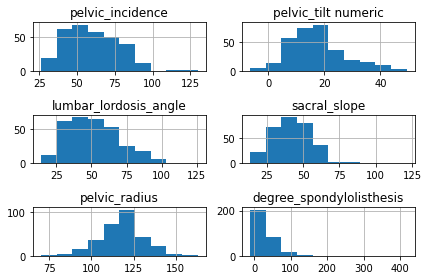

In [68]:
data.hist()
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


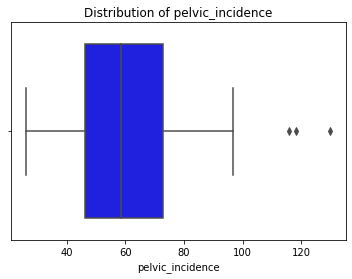

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


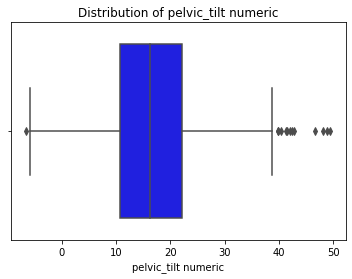

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


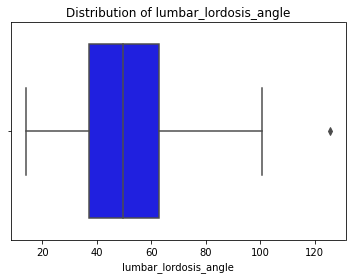

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


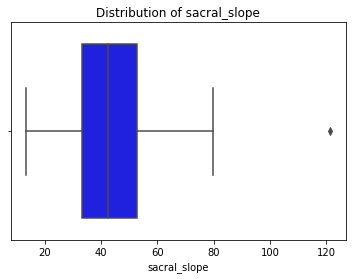

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


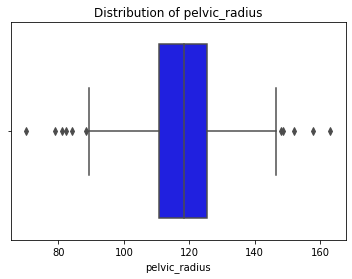

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


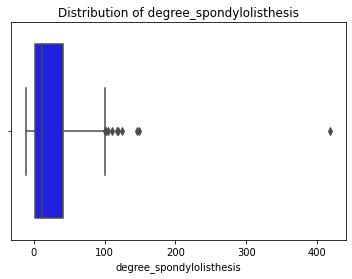

In [69]:
for col in cols[:-1]:
  sns.boxplot(data[col],color='blue')
  plt.title('Distribution of {}'.format(col))
  plt.show()

Point out any observations and comment on the strength of the relationships if any.

Strngth of relationships: 



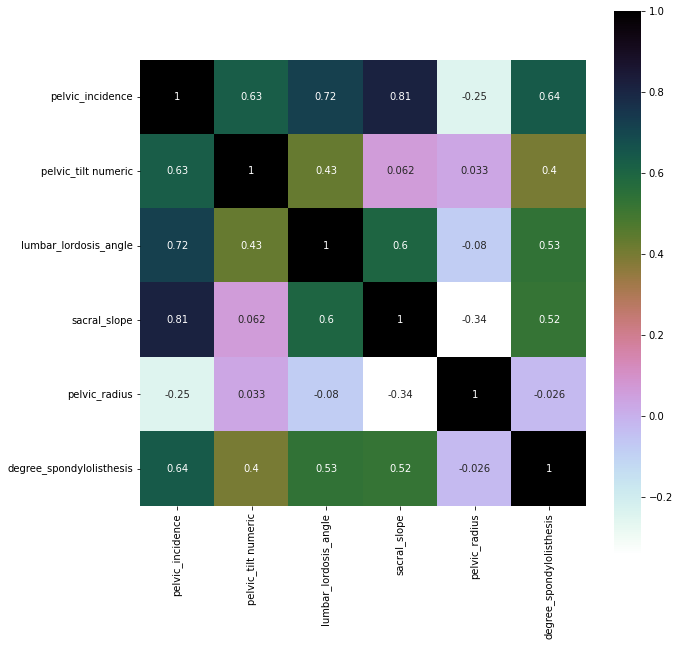

In [70]:
print('Strngth of relationships: \n')
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap='cubehelix_r',square=True)

## Section III : Prepare data for Training!

Make a new column symptom_class with the abnormal rows as 0 and the normal rows as 1, drop the class column

In [71]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(data['class'])
data['symptom_class'] = le.transform(data['class'])
data.drop('class', axis=1,inplace = True)
data

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,symptom_class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,1
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,1
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,1
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,1


Split the entire dataset into independent features and symptoms as the response variable

In [72]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
305    1
306    1
307    1
308    1
309    1
Name: symptom_class, Length: 310, dtype: int64

Normalize the variables.

In [75]:
mms = preprocessing.MinMaxScaler()
X1 = mms.fit_transform(X)
X = pd.DataFrame(X1)
X.columns = cols[:-1]
X

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173
...,...,...,...,...,...,...
305,0.209822,0.360293,0.196881,0.193591,0.509380,0.015858
306,0.268009,0.487194,0.136211,0.183674,0.476223,0.024761
307,0.340438,0.522443,0.287897,0.234907,0.597796,0.019437
308,0.184257,0.272352,0.246846,0.214623,0.521175,0.026240


## Section IV : Training with KNN

In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Use train_test_split from sklearn and split the parameters and classes into train and test sets

In [78]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Starting with three nearest neighbours , train your KNN model and make a note of accuracy

In [88]:
bestscore = 0
for i in range(3,21):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_test)
  accscore = accuracy_score(y_test, y_pred)
  print('Accuracy score with k = ',i,'is', accscore)
  if accscore>bestscore:
    bestscore=accscore
    nk = i
print('Best accuracy : ',bestscore)
print('with k =',nk)


Accuracy score with k =  3 is 0.7419354838709677
Accuracy score with k =  4 is 0.7741935483870968
Accuracy score with k =  5 is 0.7741935483870968
Accuracy score with k =  6 is 0.7580645161290323
Accuracy score with k =  7 is 0.8064516129032258
Accuracy score with k =  8 is 0.7903225806451613
Accuracy score with k =  9 is 0.7903225806451613
Accuracy score with k =  10 is 0.8225806451612904
Accuracy score with k =  11 is 0.7903225806451613
Accuracy score with k =  12 is 0.7903225806451613
Accuracy score with k =  13 is 0.7741935483870968
Accuracy score with k =  14 is 0.7903225806451613
Accuracy score with k =  15 is 0.7903225806451613
Accuracy score with k =  16 is 0.7903225806451613
Accuracy score with k =  17 is 0.7903225806451613
Accuracy score with k =  18 is 0.8064516129032258
Accuracy score with k =  19 is 0.7903225806451613
Accuracy score with k =  20 is 0.8064516129032258
Best accuracy :  0.8225806451612904
with k= 10


## Section V : Training with Naive Bayes

Train a NB model with default arguments and make a note of training and test metrics

In [89]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(x_train, y_train)

y_pred = nb.predict(x_test)

print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.6612903225806451


# KNN gives an accuracy of around 82.25% and NB gives us an accuracy of around 66.12%. Hence, would recommend KNN